In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


file_path = 'C:/Users/qaism/OneDrive - University of Virginia/Documents/GitHub/assignment3/data/airbnb_hw.csv'
df = pd.read_csv(file_path)
print(df.head())


    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  Review Scores R

In [8]:
print("\nSummary statistics before cleaning:")
print(df[['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']].describe())



Summary statistics before cleaning:
               Beds  Number Of Reviews  Review Scores Rating
count  30393.000000       30478.000000          22155.000000
mean       1.530089          12.018735             91.993230
std        1.015359          21.980703              8.850373
min        0.000000           0.000000             20.000000
25%        1.000000           0.000000             89.000000
50%        1.000000           3.000000             94.000000
75%        2.000000          13.000000            100.000000
max       16.000000         257.000000            100.000000


In [9]:
# Convert the 'Price' column to numeric, coercing errors to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows where 'Price' is NaN since it's a key variable
df = df.dropna(subset=['Price'])

# For 'Beds', if the value is missing (previously set to -1), it's critical for an Airbnb listing. Drop those rows.
df = df[df['Beds'] != -1]

# Ensure 'Number Of Reviews' are all >= 0
df = df[df['Number Of Reviews'] >= 0]

# Replace the placeholder '-1' in 'Review Scores Rating' with np.nan to indicate missing data
df['Review Scores Rating'].replace(-1, np.nan, inplace=True)

print("\nSummary statistics after cleaning:")
print(df[['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']].describe())


Summary statistics after cleaning:
              Price          Beds  Number Of Reviews  Review Scores Rating
count  30297.000000  30214.000000       30297.000000          22104.000000
mean     153.357032      1.519329          12.074166             91.986699
std      108.895698      0.983635          22.026957              8.847351
min       10.000000      0.000000           0.000000             20.000000
25%       80.000000      1.000000           0.000000             89.000000
50%      125.000000      1.000000           3.000000             94.000000
75%      192.000000      2.000000          13.000000            100.000000
max      999.000000     16.000000         257.000000            100.000000


In [10]:
df_to_normalize = df[['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']]
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_to_normalize), columns=df_to_normalize.columns)
df_normalized.dropna(inplace=True)
print(df_normalized.head())


      Price    Beds  Number Of Reviews  Review Scores Rating
4  0.544995  0.1875           0.151751                 0.950
5  0.140546  0.0625           0.015564                 1.000
6  0.242669  0.0625           0.035019                 1.000
7  0.080890  0.0625           0.311284                 0.925
8  0.262892  0.1250           0.369650                 0.875


In [11]:
from sklearn.cluster import KMeans
X = df_normalized[['Beds', 'Number Of Reviews', 'Review Scores Rating']]
# Initialize KMeans with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the model
kmeans.fit(X)

# Add the cluster labels to the original DataFrame
df_normalized['Cluster_Label'] = kmeans.labels_

print(df_normalized.head())


c:\Python311-32\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      Price    Beds  Number Of Reviews  Review Scores Rating  Cluster_Label
4  0.544995  0.1875           0.151751                 0.950              5
5  0.140546  0.0625           0.015564                 1.000              4
6  0.242669  0.0625           0.035019                 1.000              4
7  0.080890  0.0625           0.311284                 0.925              2
8  0.262892  0.1250           0.369650                 0.875              2


c:\Python311-32\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


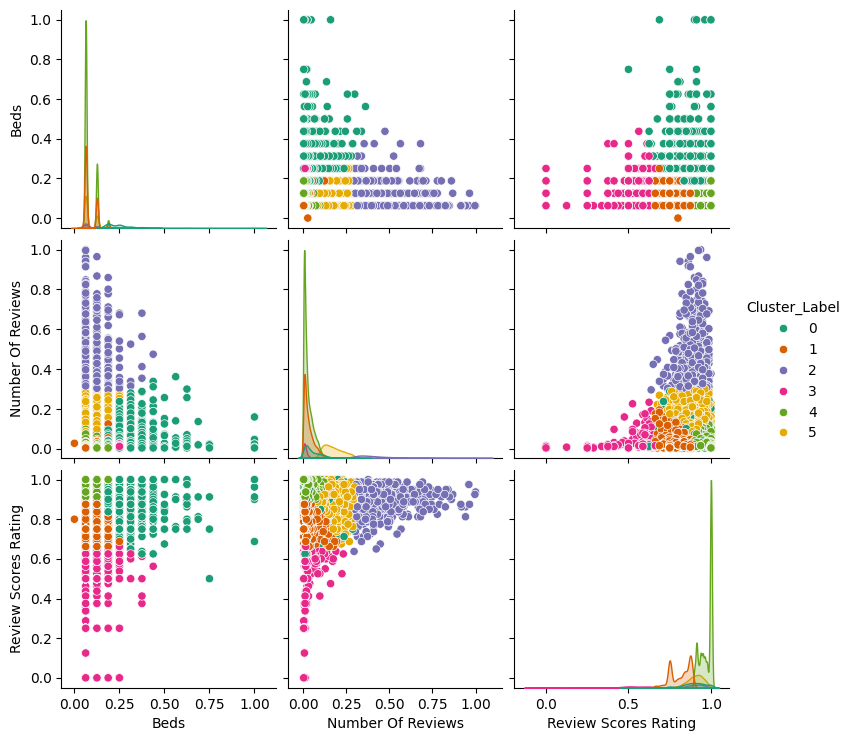

In [12]:

# Use seaborn's pairplot to visualize the clusters in multiple dimensions
sns.pairplot(df_normalized, hue='Cluster_Label', vars=['Beds', 'Number Of Reviews', 'Review Scores Rating'], palette='Dark2')
plt.show()

In [13]:
# Add the original 'Price' column back to the normalized DataFrame for this analysis
df_normalized['Original_Price'] = df['Price']

# Use .groupby and .describe to compute statistics for 'Price' in each cluster
price_stats_by_cluster = df_normalized.groupby('Cluster_Label')['Original_Price'].describe()

# Compute the average price for each cluster
average_price_by_cluster = price_stats_by_cluster['mean']

# Display the average price for each cluster
print(average_price_by_cluster.sort_values(ascending=False))

Cluster_Label
5    157.051429
0    156.378146
2    154.304071
4    154.038484
1    153.156101
3    148.974125
Name: mean, dtype: float64


c:\Python311-32\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311-32\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311-32\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311-32\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

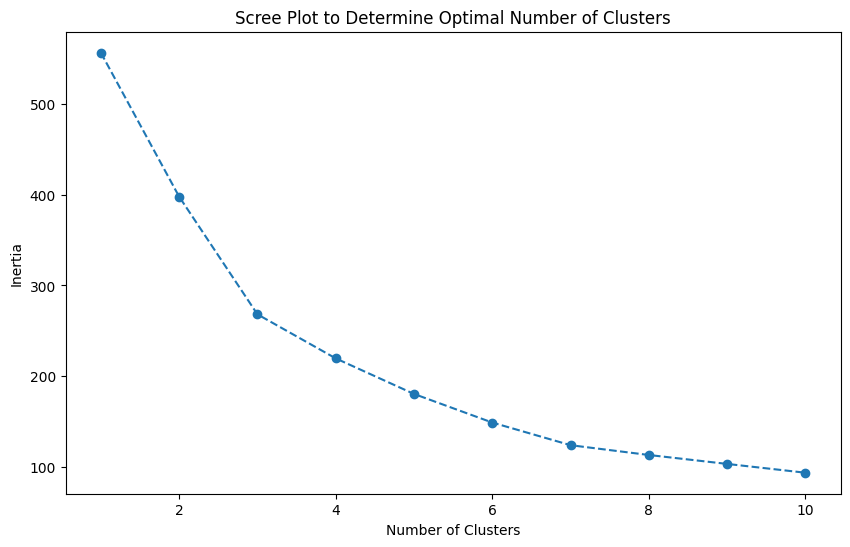

Cluster_Label_Optimal
0    159.146527
1    153.957147
2    152.266828
Name: mean, dtype: float64


c:\Python311-32\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
# For Scree Plot to determine optimal number of clusters
inertia = []

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Loop through different numbers of clusters to populate the inertia list
# You can change the range to a smaller set if needed
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot to Determine Optimal Number of Clusters')
plt.show()

# Once you identify the optimal number of clusters from the scree plot, you can repeat steps 4 and 5:
# Initialize KMeans with the optimal number of clusters (replace 'optimal_k' with the number you find)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(X)

# Add the cluster labels to the DataFrame
df_normalized['Cluster_Label_Optimal'] = kmeans.labels_

# Compute the average price for each new cluster
price_stats_by_cluster_optimal = df_normalized.groupby('Cluster_Label_Optimal')['Original_Price'].describe()
average_price_by_cluster_optimal = price_stats_by_cluster_optimal['mean']

# Display the average price for each new cluster
print(average_price_by_cluster_optimal.sort_values(ascending=False))